### Visualize W&B results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb
wandb.login()

wandb: Currently logged in as: simonkral99 (uni-ma) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
api = wandb.Api()

# Replace with your actual W&B username and project name
runs = api.runs("simonkral99/Thesis_MTSF")

In [ ]:

run_data = []

for run in runs:
    summary = run.summary._json_dict
    config = {k: v for k, v in run.config.items() if not k.startswith('_')}
    run_data.append({**config, **summary, "run_id": run.id, "name": run.name})

df = pd.DataFrame(run_data)


columns_to_keep = ['model', 'pred_len', 'random_seed', 'patience', 'data_path', 'mae', 'mse', 'seq_len', 'conv_kernel_size', 'n_blocks', 'cd_regularization', 'learn_cd_regularization', 
                   'convex', 'sigmoid', 'lambda_freeze_patience']

# Keep only those columns
df_subset = df[columns_to_keep]
df_subset['data_path'] = df_subset['data_path'].str.replace('.csv', '', regex=False)

display(df_subset)
#print(df.columns)

/scratch/ipykernel_3170769/103429177.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['data_path'] = df_subset['data_path'].str.replace('.csv', '', regex=False)


,model,pred_len,random_seed,data_path,mae,mse,seq_len,conv_kernel_size,n_blocks,cd_regularization,learn_cd_regularization,convex,sigmoid
0,DLinear,24,2021,national_illness,0.974513,1.963897,104,NaN,NaN,NaN,NaN,NaN,NaN
1,DLinear,96,2021,ETTh1,0.395379,0.372835,336,NaN,NaN,NaN,NaN,NaN,NaN
2,DLinear,96,2021,ETTh2,0.344102,0.278666,336,NaN,NaN,NaN,NaN,NaN,NaN
3,DLinear,96,2021,ETTm1,0.346427,0.302771,336,NaN,NaN,NaN,NaN,NaN,NaN
4,DLinear,96,2021,traffic,0.282222,0.410296,336,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Linear_CD,720,2021,weather,0.377066,0.316573,192,5.0,1.0,0.0,0,1,0
212,Linear_CD,96,2021,weather,0.246320,0.163084,336,5.0,1.0,0.0,0,1,0
213,Linear_CD,720,2021,weather,0.394001,0.332065,336,5.0,1.0,0.0,0,1,0
214,Linear_CD,96,2021,weather,0.281274,0.193224,720,5.0,1.0,0.0,0,1,0


### Results published in papers

In [4]:
paper_results_df = pd.read_csv('../paper_results.csv')
paper_results_df.head()

,Dataset,Prediction Length,MSE,MAE,model,source,ci_cd,model_source
0,ETTm1,96,0.288,0.343,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)
1,ETTm1,192,0.326,0.367,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)
2,ETTm1,336,0.365,0.391,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)
3,ETTm1,720,0.412,0.413,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)
4,ETTm1,Avg,0.348,0.379,TVNet,li2025_tvnet,CD,TVNet (li2025_tvnet)


### HPO

In [5]:
model = "Simon_DWSC"
#data = "ETTh1"
hyperparam = "conv_kernel_size"
metric = "mse"

df_hpo = df_subset[(df_subset['model'] == model)]
#df_hpo = df_hpo.dropna()
df_hpo = df_hpo.sort_values(by=hyperparam, ascending=True)
display(df_hpo.head())

df_ref = paper_results_df[
    #(paper_results_df['source'] == "nie2023_patchtst") | 
    #(paper_results_df['model'] == "Linear") | (paper_results_df['model'] == "Linear_CI") | (paper_results_df['model'] == "Linear_CD")
    (paper_results_df['model'] == "Linear_CI") | (paper_results_df['model'] == "Linear_CD")
]

df_ref.columns = ['data_path', 'pred_len', 'mse', 'mae', 'model', 'source', 'ci_cd', 'model_source']
df_ref = df_ref.replace("ILI", "national_illness")
df_ref = df_ref.replace("Traffic", "traffic")
df_ref = df_ref.replace("Weather", "weather")

df_ref = df_ref.dropna()

color_map = {'CI': 'tab:blue', 'CD': 'tab:orange'}

display(df_ref.head())

,model,pred_len,random_seed,data_path,mae,mse,seq_len,conv_kernel_size,n_blocks,cd_regularization,learn_cd_regularization,convex,sigmoid
20,Simon_DWSC,24,2021,national_illness,1.015148,2.353054,104,3.0,1.0,NaN,NaN,NaN,NaN
21,Simon_DWSC,60,2021,national_illness,1.035644,2.504811,104,3.0,1.0,NaN,NaN,NaN,NaN
28,Simon_DWSC,96,2021,ETTh1,0.439837,0.432434,336,3.0,1.0,NaN,NaN,NaN,NaN
30,Simon_DWSC,720,2021,ETTh1,0.761976,0.945581,336,3.0,1.0,NaN,NaN,NaN,NaN
29,Simon_DWSC,96,2021,traffic,0.474268,0.770797,336,5.0,1.0,NaN,NaN,NaN,NaN


,data_path,pred_len,mse,mae,model,source,ci_cd,model_source
1050,ETTm1,96,0.433,0.441,Linear_CD,han2024_capacity,CD,Linear_CD (han2024_capacity)
1055,ETTm2,96,0.269,0.372,Linear_CD,han2024_capacity,CD,Linear_CD (han2024_capacity)
1060,ETTh1,96,0.514,0.497,Linear_CD,han2024_capacity,CD,Linear_CD (han2024_capacity)
1065,ETTh2,96,1.520,0.961,Linear_CD,han2024_capacity,CD,Linear_CD (han2024_capacity)
1070,Electricity,96,0.444,0.493,Linear_CD,han2024_capacity,CD,Linear_CD (han2024_capacity)


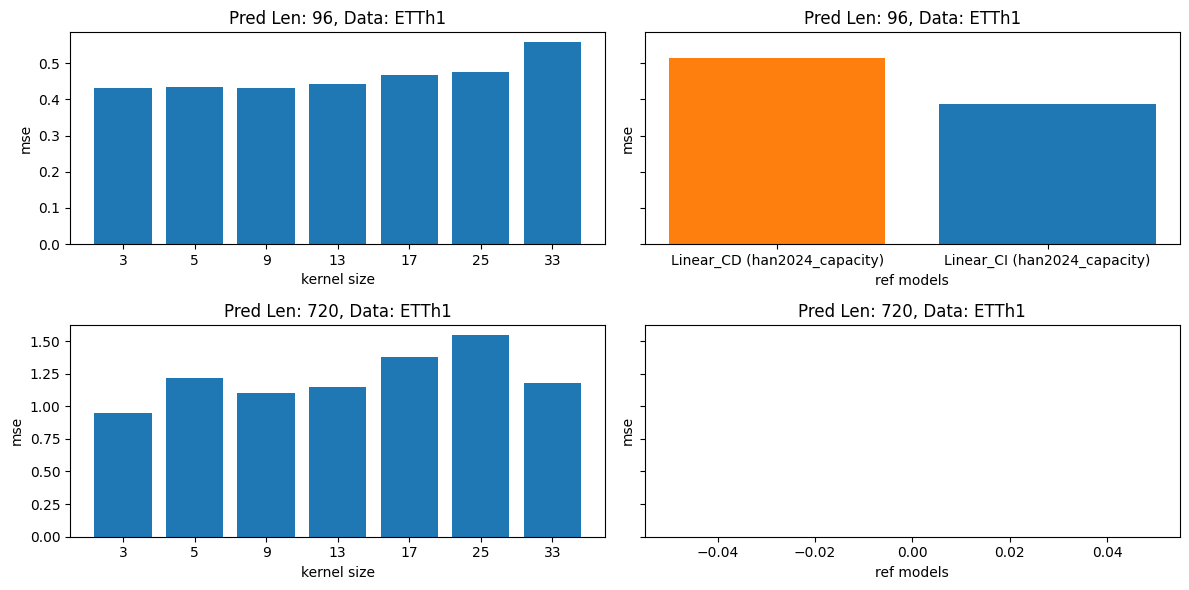

In [6]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_filtered = df_hpo[(df_hpo['pred_len'] == pred_len) & (df_hpo['data_path'] == data_path)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(int).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("kernel size")
        
        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/DWSC/"+data_path+"_"+model+".png", dpi=300)
plt.show()

,data_path,pred_len,mse,mae,model,source,ci_cd,model_source
1090,national_illness,24,2.343,0.955,Linear_CD,han2024_capacity,CD,Linear_CD (han2024_capacity)
1140,national_illness,24,2.847,1.163,Linear_CI,han2024_capacity,CI,Linear_CI (han2024_capacity)


['tab:orange', 'tab:blue']
2 2


,data_path,pred_len,mse,mae,model,source,ci_cd,model_source


[]
0 0


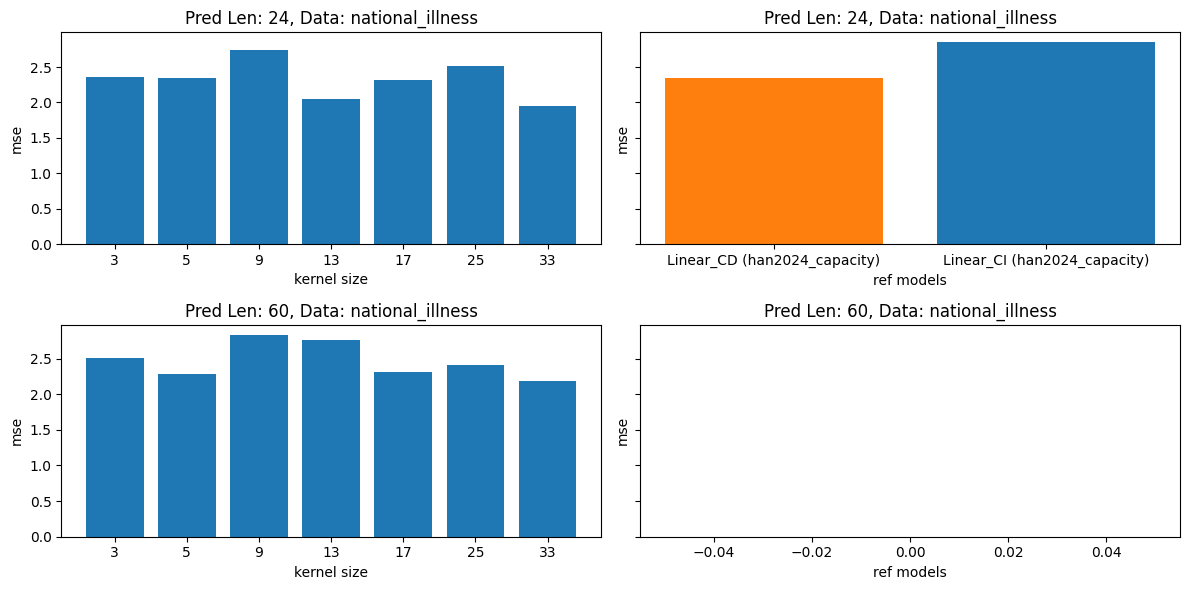

In [7]:
pred_len_list = [24, 60]
data_path_list = ["national_illness"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_filtered = df_hpo[(df_hpo['pred_len'] == pred_len) & (df_hpo['data_path'] == data_path)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(int).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("kernel size")
        
        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        display(df_filtered.head())
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        print(colors)
        print(len(df_filtered), len(colors))
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/DWSC/"+data_path+"_"+model+".png", dpi=300)
plt.show()

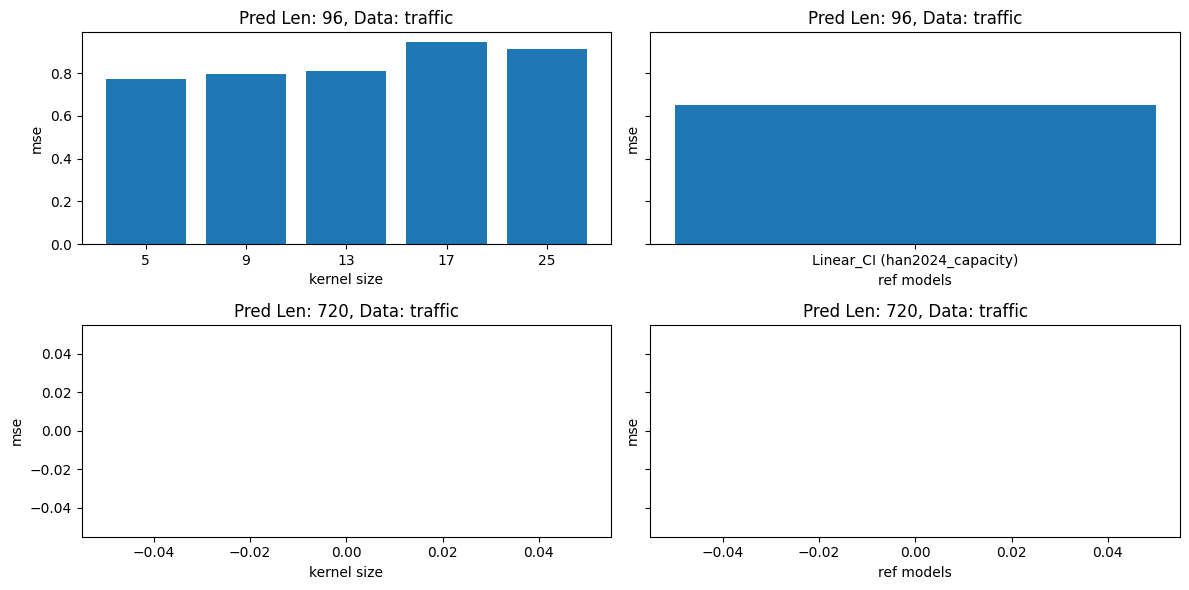

In [8]:
pred_len_list = [96, 720]
data_path_list = ["traffic"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_filtered = df_hpo[(df_hpo['pred_len'] == pred_len) & (df_hpo['data_path'] == data_path)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(int).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("kernel size")
        
        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/DWSC/"+data_path+"_"+model+".png", dpi=300)
plt.show()

# Delta model

In [9]:
model = "Linear_Delta"
metric = "mse"
hyperparam = "cd_regularization"

df_delta = df_subset[(df_subset['model'] == model)]
#df_delta = df_delta.dropna()
df_delta = df_delta.sort_values(by=hyperparam, ascending=True)
#display(df_delta.head())

# CI + CD noch visual.!


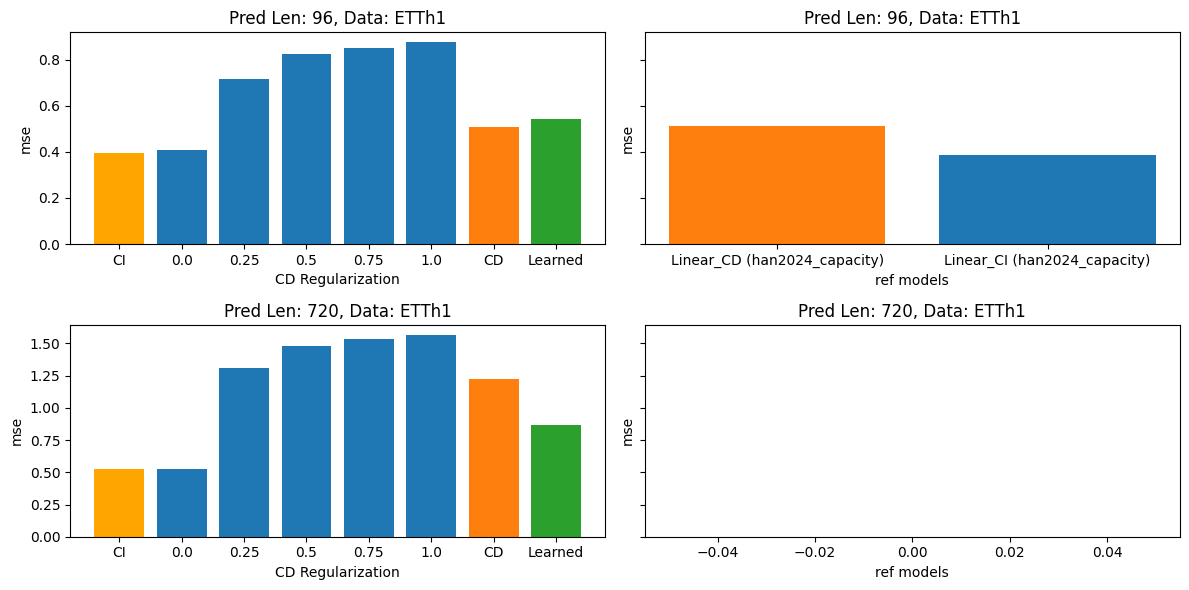

In [10]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True)]
        axs[i * len(data_path_list) + j, 0].bar("Learned", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+".png", dpi=300)
plt.show()

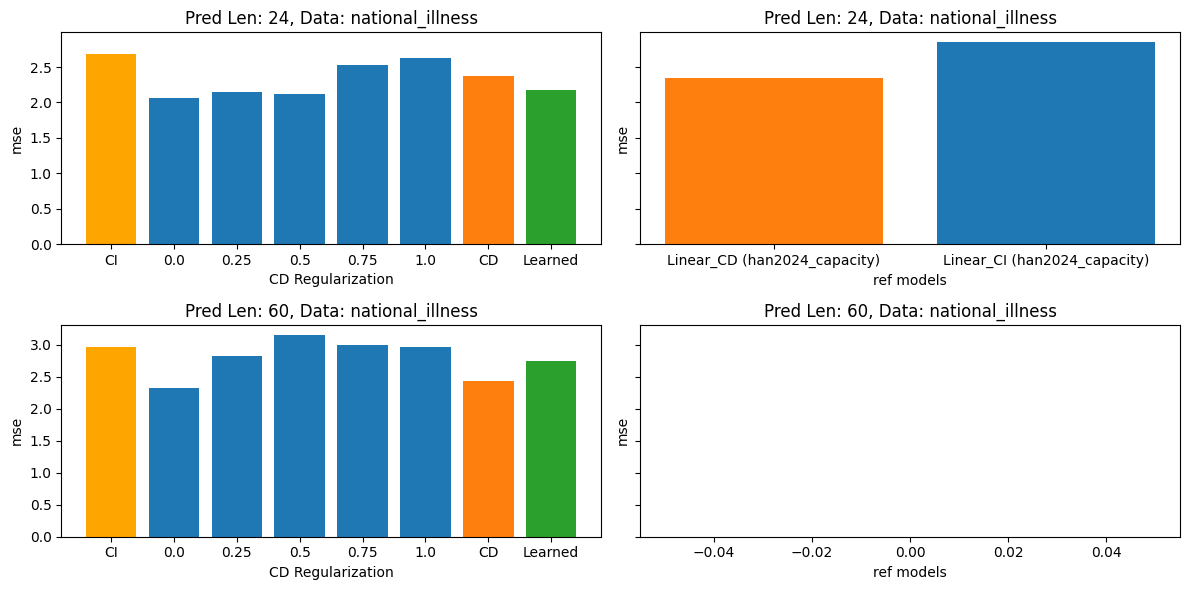

In [11]:
pred_len_list = [24, 60]
data_path_list = ["national_illness"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 36)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')
        
        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 36)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True)]
        axs[i * len(data_path_list) + j, 0].bar("Learned", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+".png", dpi=300)
plt.show()

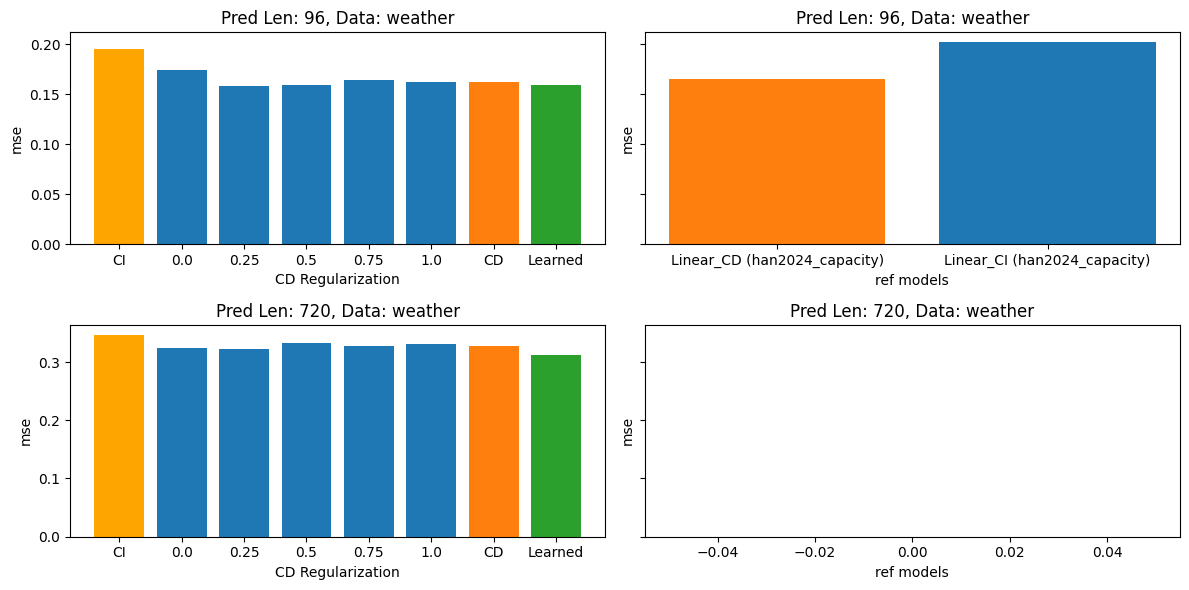

In [12]:
pred_len_list = [96, 720]
data_path_list = ["weather"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True)]
        axs[i * len(data_path_list) + j, 0].bar("Learned", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+".png", dpi=300)
plt.show()

# Compare results (han2024_capacity)

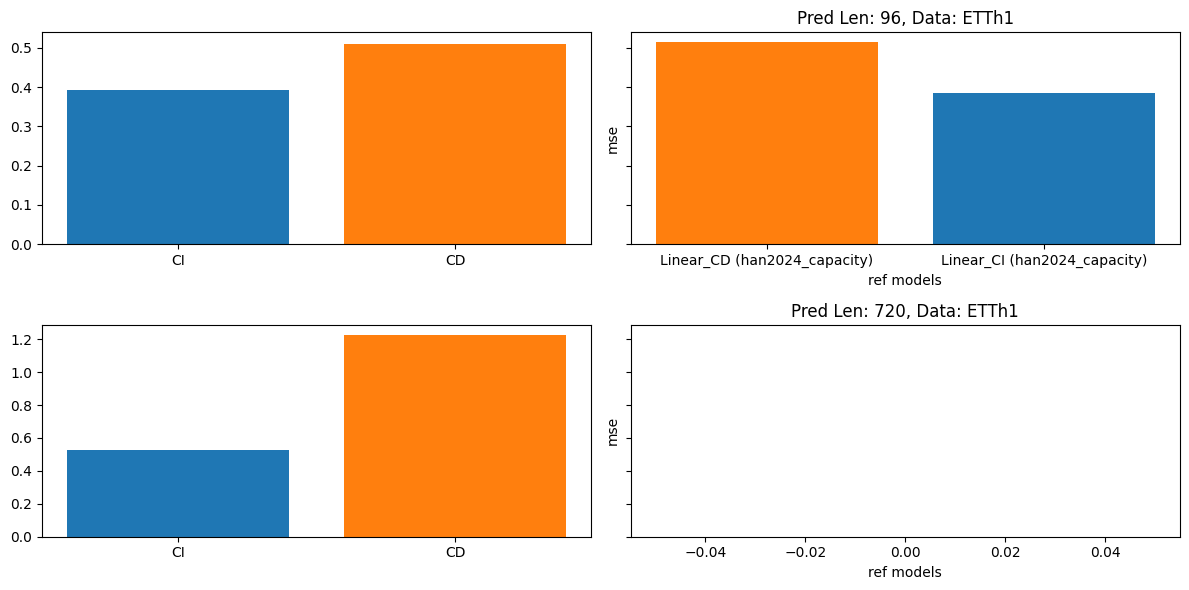

In [13]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric])

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Comp/"+data_path+"_"+model+".png")
plt.show()

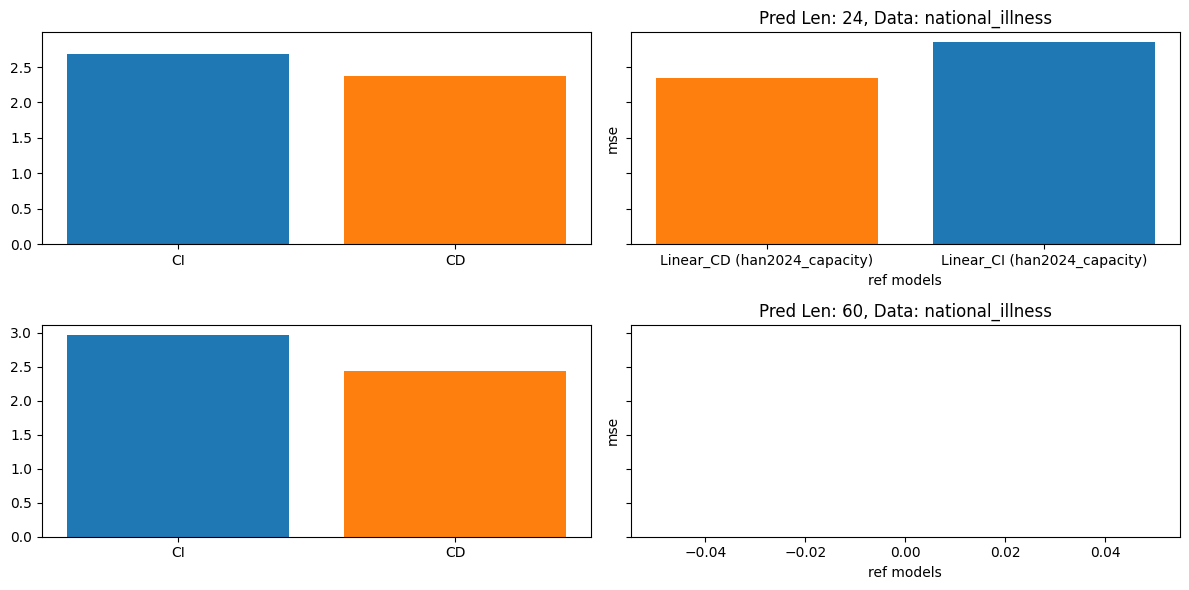

In [14]:
pred_len_list = [24, 60]
data_path_list = ["national_illness"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 36)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric])

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 36)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Comp/"+data_path+"_"+model+".png")
plt.show()

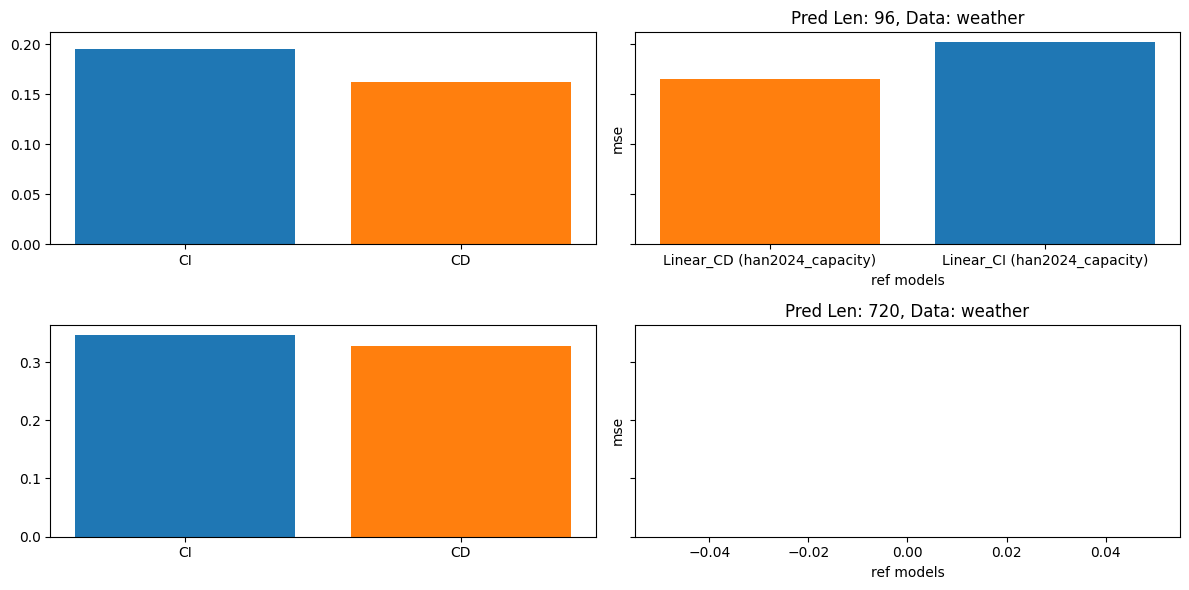

In [15]:
pred_len_list = [96, 720]
data_path_list = ["weather"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric])

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 96)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Comp/"+data_path+"_"+model+".png")
plt.show()

# Convex

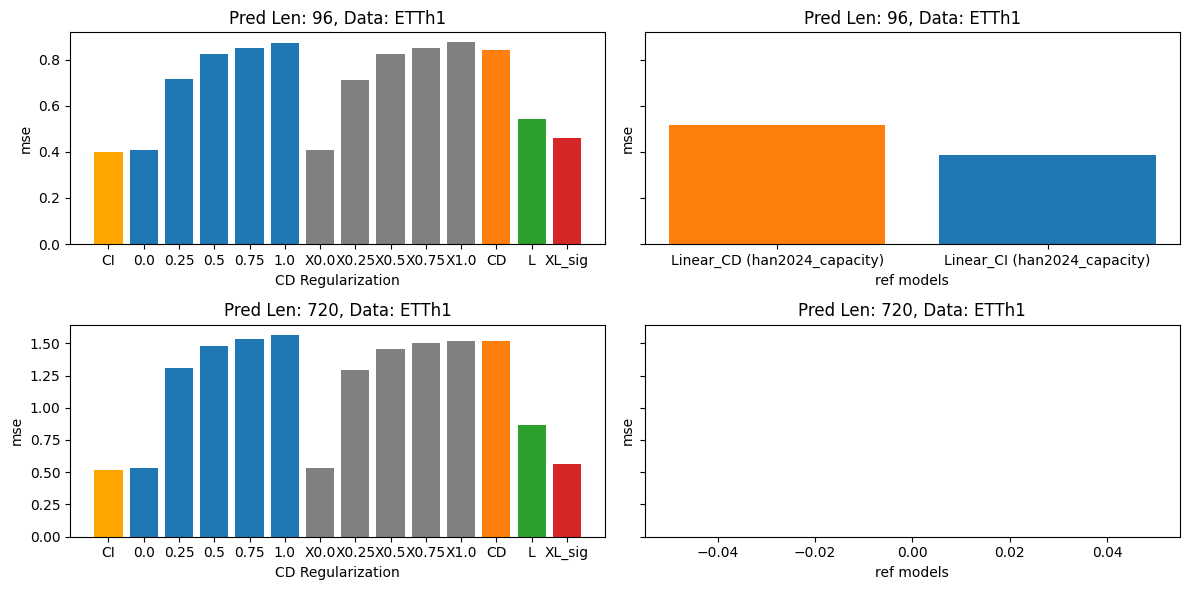

In [16]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 336)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False) & (df_delta['convex'].isna())]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == 0) & (df_delta['convex'] == 1)]
        axs[i * len(data_path_list) + j, 0].bar("X"+df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric], color='grey')
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 336)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True) & (df_delta['convex'].isna())]
        axs[i * len(data_path_list) + j, 0].bar("L", df_filtered[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == 1) & (df_delta['convex'] == 1) & (df_delta['sigmoid'] == 1)]
        axs[i * len(data_path_list) + j, 0].bar("XL_sig", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+"_v2.png")
plt.show()

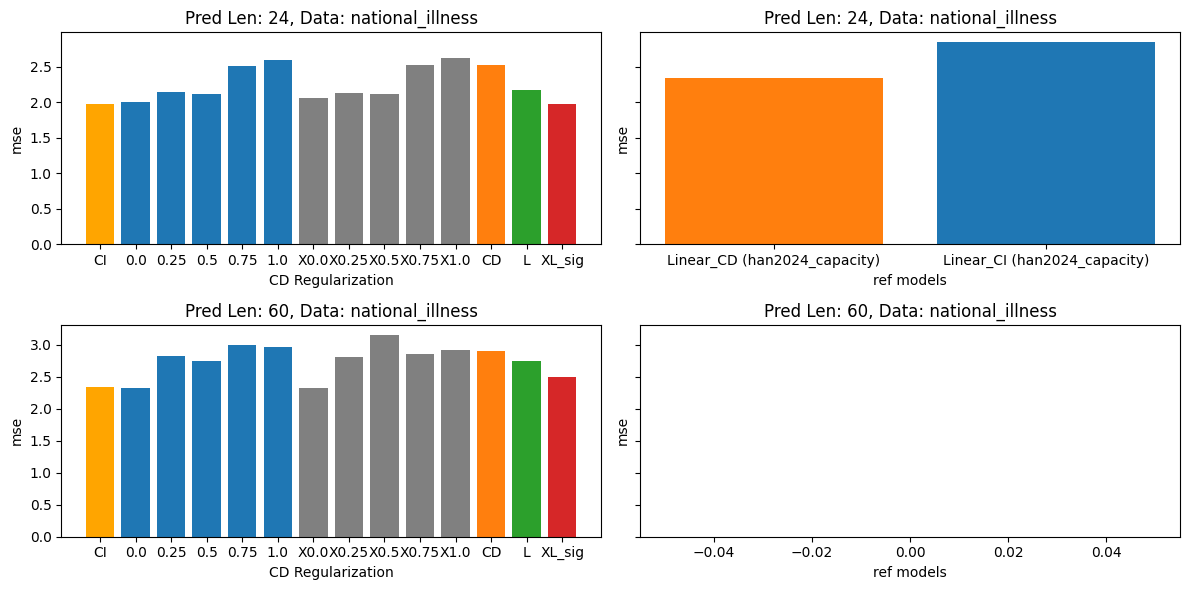

In [17]:
pred_len_list = [24, 60]
data_path_list = ["national_illness"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        #df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 104)]
        axs[i * len(data_path_list) + j, 0].bar("CI", df_CI[metric], color='orange')
        
        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == False) & (df_delta['convex'].isna())]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == 0) & (df_delta['convex'] == 1)]
        axs[i * len(data_path_list) + j, 0].bar("X"+df_filtered[hyperparam].astype(float).astype(str), df_filtered[metric], color='grey')
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CD Regularization")

        #df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len) & (df_subset['seq_len'] == 104)]
        axs[i * len(data_path_list) + j, 0].bar("CD", df_CD[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == True) & (df_delta['convex'].isna())]
        axs[i * len(data_path_list) + j, 0].bar("L", df_filtered[metric])

        df_filtered = df_delta[(df_delta['pred_len'] == pred_len) & (df_delta['data_path'] == data_path) & (df_delta['learn_cd_regularization'] == 1) & (df_delta['convex'] == 1) & (df_delta['sigmoid'] == 1)]
        axs[i * len(data_path_list) + j, 0].bar("XL_sig", df_filtered[metric])

        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        categories = df_filtered["ci_cd"].tolist()
        colors = [color_map[cat] for cat in categories]
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model_source"], df_filtered[metric], color=colors)
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("ref models")

plt.tight_layout()
plt.savefig("plots/Delta/"+data_path+"_"+model+"_v2.png", dpi=300)
plt.show()

# Seq_len variations

In [ ]:
df_subset = df_subset.sort_values(by="seq_len", ascending=True)

# han capacity: ILI - 36, Rest - 96
# patchtst: ILI - 104, Rest - 336

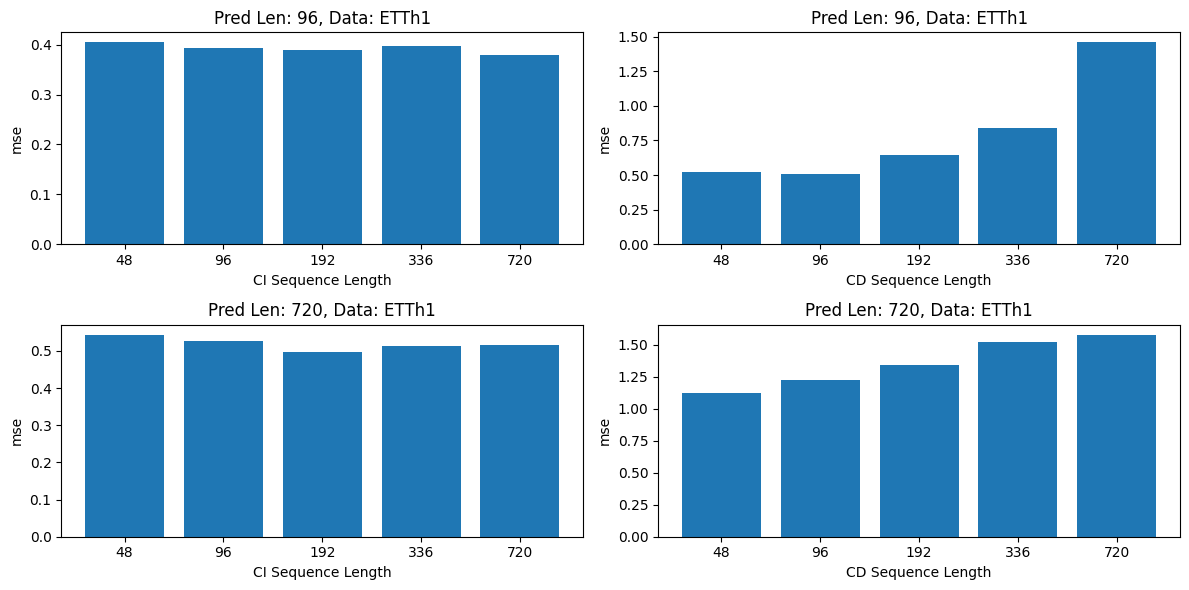

In [ ]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        axs[i * len(data_path_list) + j, 0].bar(df_CI['seq_len'].astype(int).astype(str), df_CI[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CI Sequence Length")

        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        axs[i * len(data_path_list) + j, 1].bar(df_CD['seq_len'].astype(int).astype(str), df_CD[metric])
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("CD Sequence Length")

plt.tight_layout()
plt.savefig("plots/Seq_Len_CI_CD/"+data_path+"_Linear.png")
plt.show()

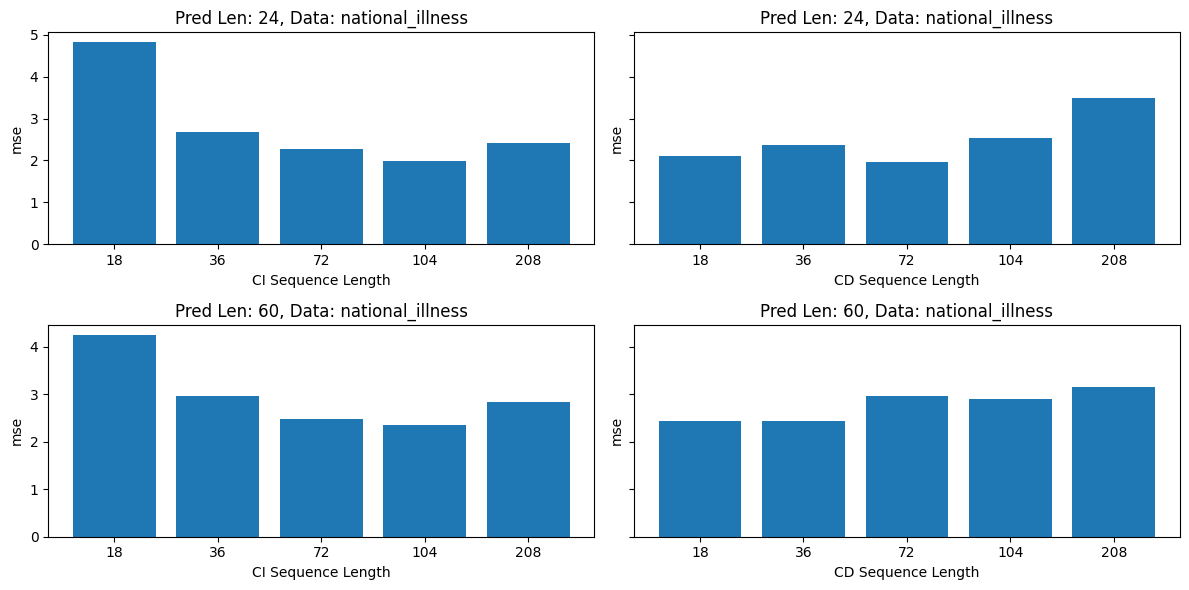

In [31]:
pred_len_list = [24, 60]
data_path_list = ["national_illness"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        axs[i * len(data_path_list) + j, 0].bar(df_CI['seq_len'].astype(int).astype(str), df_CI[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CI Sequence Length")

        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        axs[i * len(data_path_list) + j, 1].bar(df_CD['seq_len'].astype(int).astype(str), df_CD[metric])
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("CD Sequence Length")

plt.tight_layout()
plt.savefig("plots/Seq_Len_CI_CD/"+data_path+"_Linear.png")
plt.show()

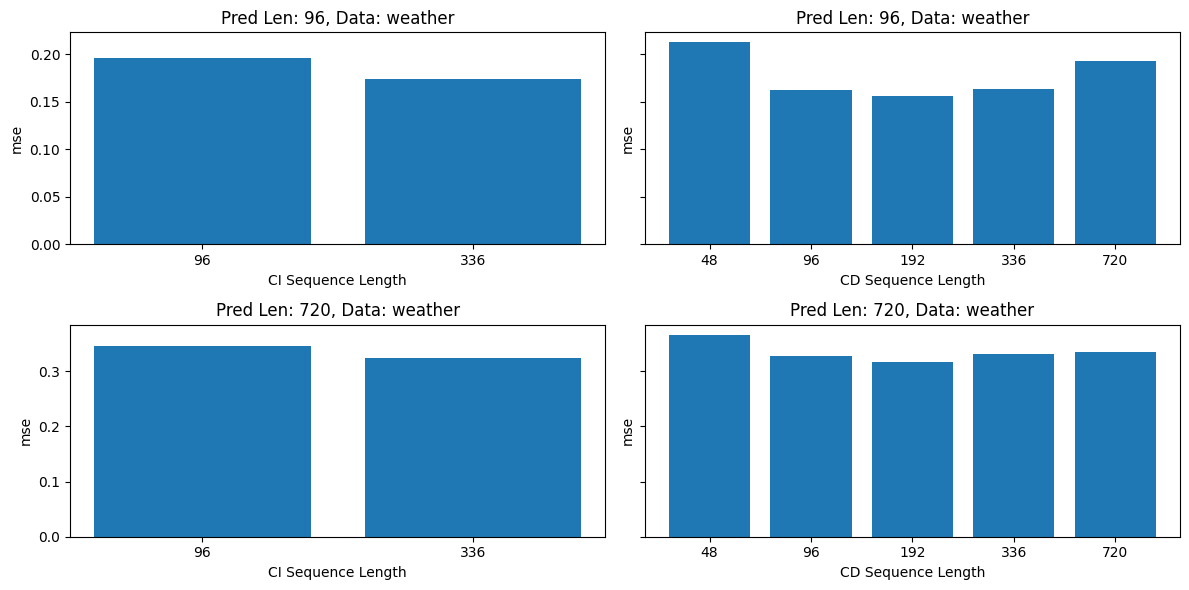

In [32]:
pred_len_list = [96, 720]
data_path_list = ["weather"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_CI = df_subset[(df_subset['model'] == "Linear") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        axs[i * len(data_path_list) + j, 0].bar(df_CI['seq_len'].astype(int).astype(str), df_CI[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 0].set_xlabel("CI Sequence Length")

        df_CD = df_subset[(df_subset['model'] == "Linear_CD") & (df_subset['data_path'] == data_path) & (df_subset['pred_len'] == pred_len)]
        axs[i * len(data_path_list) + j, 1].bar(df_CD['seq_len'].astype(int).astype(str), df_CD[metric])
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)
        axs[i * len(data_path_list) + j, 1].set_xlabel("CD Sequence Length")

plt.tight_layout()
plt.savefig("plots/Seq_Len_CI_CD/"+data_path+"_Linear.png")
plt.show()